<h1 align = 'center'>Reporte de Mercado

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

Definiendo tickers de los indices a seguir

In [2]:
tickers = {
    "Soja": "ZS=F",       # Futuros de Soja
    "Trigo": "ZW=F",      # Futuros de Trigo
    "Petróleo": "CL=F",   # Petróleo WTI
    "Oro": "GC=F",        # Futuros de Oro
    "S&P 500": "^GSPC",   # Índice de S&P 500
    "Nasdaq": "^IXIC",    # Índice Nasdaq
    "Nvidia": "NVDA"      # Acciones Nvidia
}

Obteniendo las cotizaciones de los últimos 90 días

In [ ]:
end_date = datetime.today()

start_date = end_date - timedelta(days=90)

data = yf.download(
    list(
        tickers.values()),
        start=start_date, 
        end=end_date)['Close']


C:\Users\PC\AppData\Local\Temp\ipykernel_21384\3969357514.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(
[*********************100%***********************]  7 of 7 completed


In [ ]:
# Datos obtenidos

data.head(10)

Ticker,CL=F,GC=F,NVDA,ZS=F,ZW=F,^GSPC,^IXIC
Date,,,,,,,
2025-06-20,74.930000,3368.100098,143.841888,1068.00,567.75,5967.839844,19447.410156
2025-06-23,68.510002,3377.699951,144.161865,1058.75,552.75,6025.169922,19630.970703
2025-06-24,64.370003,3317.399902,147.891647,1046.75,535.75,6092.180176,19912.529297
2025-06-25,64.919998,3327.100098,154.301300,1025.25,528.25,6092.160156,19973.550781
2025-06-26,65.239998,3333.500000,155.011261,1022.75,521.00,6141.020020,20167.910156
...,...,...,...,...,...,...,...
2025-09-12,62.689999,3649.399902,177.820007,1025.75,503.00,6584.290039,22141.099609
2025-09-15,63.299999,3682.199951,177.750000,1042.75,525.00,6615.279785,22348.750000
2025-09-16,64.519997,3688.899902,174.880005,1049.75,534.00,6606.759766,22333.960938


In [5]:
# Cambiando las llaves por valores para que la cabeza de las columnas tenga los nombres de los indices

data.rename(columns={v: k for k, v in tickers.items()}, inplace=True)

data

Ticker,Petróleo,Oro,Nvidia,Soja,Trigo,S&P 500,Nasdaq
Date,,,,,,,
2025-06-20,74.930000,3368.100098,143.841888,1068.00,567.75,5967.839844,19447.410156
2025-06-23,68.510002,3377.699951,144.161865,1058.75,552.75,6025.169922,19630.970703
2025-06-24,64.370003,3317.399902,147.891647,1046.75,535.75,6092.180176,19912.529297
2025-06-25,64.919998,3327.100098,154.301300,1025.25,528.25,6092.160156,19973.550781
2025-06-26,65.239998,3333.500000,155.011261,1022.75,521.00,6141.020020,20167.910156
...,...,...,...,...,...,...,...
2025-09-12,62.689999,3649.399902,177.820007,1025.75,503.00,6584.290039,22141.099609
2025-09-15,63.299999,3682.199951,177.750000,1042.75,525.00,6615.279785,22348.750000
2025-09-16,64.519997,3688.899902,174.880005,1049.75,534.00,6606.759766,22333.960938


Calculando los retornos diarios (Variaciones porcentuales diarias)

In [9]:
retornos = data.pct_change().dropna()

C:\Users\PC\AppData\Local\Temp\ipykernel_21384\1315914608.py:1: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  retornos = data.pct_change().dropna()


Retornos diarios

In [10]:
retornos

Ticker,Petróleo,Oro,Nvidia,Soja,Trigo,S&P 500,Nasdaq
Date,,,,,,,
2025-06-23,-0.085680,0.002850,0.002225,-0.008661,-0.026420,0.009607,0.009439
2025-06-24,-0.060429,-0.017852,0.025872,-0.011334,-0.030755,0.011122,0.014343
2025-06-25,0.008544,0.002924,0.043340,-0.020540,-0.013999,-0.000003,0.003064
2025-06-26,0.004929,0.001924,0.004601,-0.002438,-0.013725,0.008020,0.009731
2025-06-27,0.004292,-0.017939,0.017611,0.004889,0.007198,0.005219,0.005234
...,...,...,...,...,...,...,...
2025-09-12,0.005131,0.003437,0.003669,0.010342,0.000000,-0.000483,0.004447
2025-09-15,0.009730,0.008988,-0.000394,0.016573,0.043738,0.004707,0.009379
2025-09-16,0.019273,0.001820,-0.016146,0.006713,0.017143,-0.001288,-0.000662


Reporte Diario

In [11]:
# Obteniendo la última fila de los valores de los indices (posicion -1)

ultimo = data.iloc[-1]

# Obteniendo la última fila de retornos (var porcentuales posicion -1)

cambio_dia = retornos.iloc[-1] * 100

# Creando el DataFrame a del reporte

reporte_diario = pd.DataFrame({
    "Último Precio": ultimo.round(2),
    "Cambio Diario (%)": cambio_dia.round(2)
})

# Mostrando el Reporte
print("📌 Reporte Diario")

display(reporte_diario)

📌 Reporte Diario


,Último Precio,Cambio Diario (%)
Ticker,,
Petróleo,63.36,-1.08
Oro,3677.60,-0.11
Nvidia,176.19,3.46
Soja,1035.75,-0.77
Trigo,524.50,-0.71
S&P 500,6636.82,0.55
Nasdaq,22485.77,1.01


Reporte Semanal

In [12]:
data_semanal = data.resample("W").mean()
returns_semanal = data_semanal.pct_change().dropna()

print("\n📌 Reporte Semanal (últimas 4 semanas)")
print(returns_semanal.tail(4).round(3) * 100)


📌 Reporte Semanal (últimas 4 semanas)
Ticker      Petróleo  Oro  Nvidia  Soja  Trigo  S&P 500  Nasdaq
Date                                                           
2025-08-31       1.5  2.2     1.3   0.5    1.1      0.8     1.0
2025-09-07      -0.7  4.9    -5.3  -1.4   -0.8     -0.1    -0.0
2025-09-14      -1.6  1.7     2.5  -0.1   -0.7      1.2     1.9
2025-09-21       1.7  1.1     0.3   2.8    5.3      1.1     1.9


Gráficos

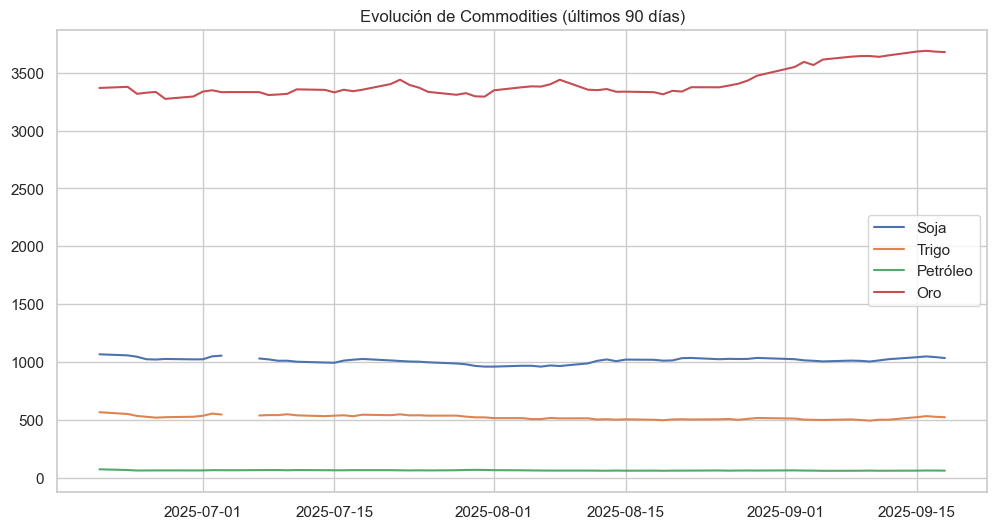

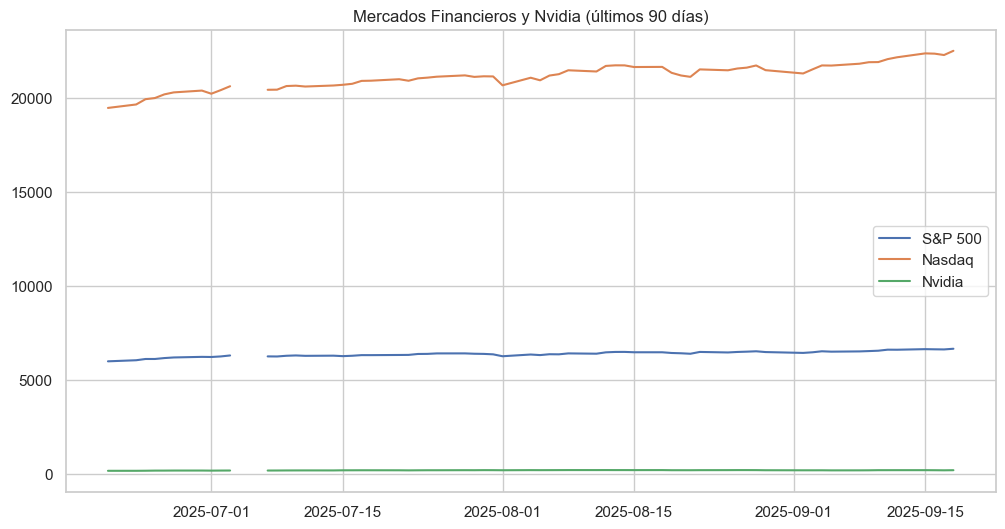

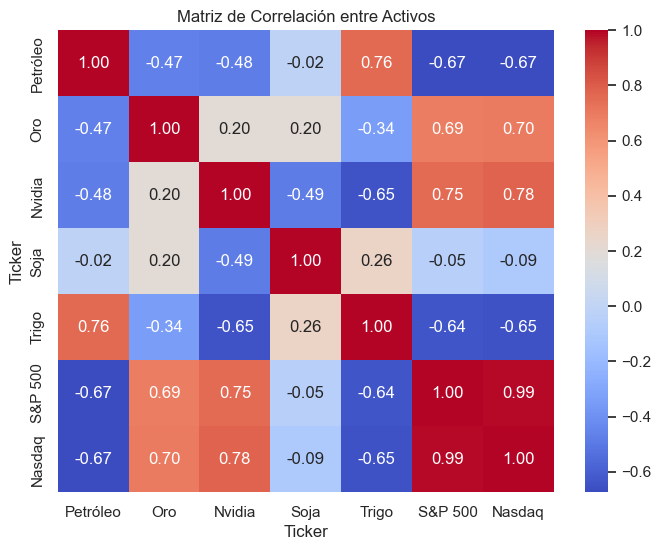

In [14]:
sns.set_theme(style="whitegrid")

# Evolución de commodities de los últimos 90 días

plt.figure(figsize=(12,6))
for col in ["Soja", "Trigo", "Petróleo", "Oro"]:
    plt.plot(data.index, data[col], label=col)
plt.title("Evolución de Commodities (últimos 90 días)")
plt.legend()
plt.show()

# Evolución de Índices y Nvidia

plt.figure(figsize=(12,6))
for col in ["S&P 500", "Nasdaq", "Nvidia"]:
    plt.plot(data.index, data[col], label=col)
plt.title("Mercados Financieros y Nvidia (últimos 90 días)")
plt.legend()
plt.show()

# Correlación entre Activos

plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Activos")
plt.show()